# Seaborn - Plotting with Python

### Python and Plotting
Plotting data is facilitated using a number of tools - python's own drawing tools and a many libraries & plug-ins. In this drill, we explore a number of plot actions for a basis and then integrate data that you manipulate with numpy and pandas.

### Helpful Tools
There are lots of helpful tools and demos in GitHub, some of which have been used in this drill set.  Some most common plotting examples: bar plot, scatter, line plots, histograms, and (others).

### Why visualize?
The main points of visualizing data is to communicate to the viewer (a) trends in the data, group membership (and when a member of one group intersects with another), unusual "events" or "interesting events" that warrant futher investigation, and an understanding of both the big picture of the data and the subsets (or clusters, classifications) that collectively tell a compelling story.  Adding interactivity either programmatically moving the data over a timeline or letting the user select details-on-demand really underscores the communicative goal of your cool programming.

## Data prep

1) Import numpy, pandas, matplotlib and seaborn
2) Load the file "travelData.csv" - this is a file of world travel data from the The World Bank https://data.worldbank.org/indicator/ST.INT.ARVL.

3) Do some quick exploration of the data like what are the columns and rows?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trav = pd.read_csv('travelData.csv')
trav.head()

,Country_Name,Code,Indicator_Name,Ind_Code,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,619000.0,641000.0,650000.0,647000.0,683000.0,721000.0,...,772000.0,827000.0,813000.0,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,9000.0,21000.0,45000.0,52000.0,45000.0,51000.0,...,195000.0,294000.0,366000.0,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,304000.0,287000.0,119000.0,184000.0,371000.0,317000.0,...,1062000.0,1247000.0,1711000.0,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,2347000.0,2949000.0,...,2189000.0,2059000.0,1830000.0,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2831000.0


In [3]:
trav.columns

Index(['Country_Name', 'Code', 'Indicator_Name', 'Ind_Code', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [4]:
trav.shape

(220, 26)

In [5]:
trav['Code'].value_counts(dropna=False)

CUB    1
BRN    1
SRB    1
USA    1
SEN    1
CAN    1
DOM    1
DJI    1
IRN    1
MUS    1
BEL    1
EST    1
ETH    1
TUR    1
NIC    1
LKA    1
GRL    1
MDA    1
COM    1
GIB    1
CZE    1
HKG    1
SOM    1
SWE    1
BHR    1
BLR    1
TON    1
ZMB    1
SWZ    1
VUT    1
      ..
NOR    1
AFG    1
MWI    1
KWT    1
CYP    1
PNG    1
ARG    1
AZE    1
CRI    1
DMA    1
RUS    1
HUN    1
PSE    1
FJI    1
MEX    1
UKR    1
GEO    1
BLZ    1
LVA    1
LBY    1
FIN    1
TCA    1
CMR    1
BGR    1
COL    1
CPV    1
SVK    1
FSM    1
MAR    1
GHA    1
Name: Code, Length: 220, dtype: int64

### Bar Chart

Use Seaborn to make a bar chart showing the top 10 countries with the most travelers for the year 2016.

In [6]:
# Subsetting to just 2016 /sorting to get the top 10 countries

trav2016 = trav[['Country_Name', '2016']]
bar = trav2016.sort_values(['2016'], ascending = False)
bar.head(10)

,Country_Name,2016
58,Euro area,364655000.0
140,North America,95676000.0
65,France,82570000.0
206,United States,75608000.0
60,Spain,75315000.0
36,China,59270000.0
96,Italy,52372000.0
69,United Kingdom,35814000.0
50,Germany,35555000.0
126,Mexico,35079000.0


In [7]:
# Dropping records #58 & 140 because they are areas not countries
bar.drop([58,140], inplace=True)
bar.head(10)

,Country_Name,2016
65,France,82570000.0
206,United States,75608000.0
60,Spain,75315000.0
36,China,59270000.0
96,Italy,52372000.0
69,United Kingdom,35814000.0
50,Germany,35555000.0
126,Mexico,35079000.0
193,Thailand,32530000.0
200,Turkey,30289000.0


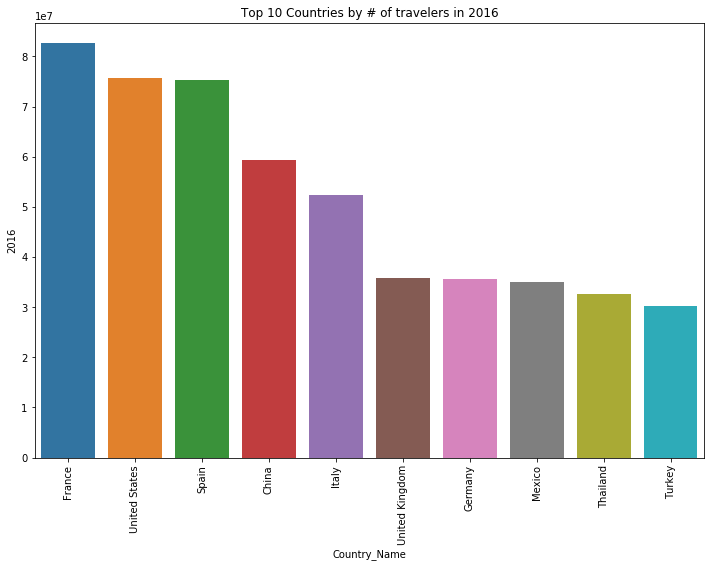

In [8]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Country_Name', y='2016', data=bar.head(10))
plt.xticks(rotation='vertical')
plt.title('Top 10 Countries by # of travelers in 2016')
plt.show()

### Scatterplot

Let's add some more data to our analysis - load the file named 'ruralPop.csv'. 

Using both files, plot a scatterplot with the x-axis being the rural pop of the nation and the y-axis being the # of travelers from that nation for the year 2016. 

In [9]:
# Read in the dataset and take a look at it

rur = pd.read_csv('ruralPop.csv')
rur.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Rural population,SP.RUR.TOTL,26685.0,27297.0,27693.0,27934.0,28108.0,28278.0,...,56536.0,56980.0,57402.0,57891.0,58227.0,58503.0,58811.0,59109.0,59362.0,59576.0
1,Afghanistan,AFG,Rural population,SP.RUR.TOTL,8241137.0,8373138.0,8512056.0,8657977.0,8810646.0,8970246.0,...,20836789.0,21257441.0,21714081.0,22257743.0,22904895.0,23632788.0,24404522.0,25165917.0,25877997.0,26530269.0
2,Angola,AGO,Rural population,SP.RUR.TOTL,4885711.0,4934184.0,4980158.0,5019278.0,5043512.0,5049018.0,...,8879762.0,9050985.0,9223200.0,9393181.0,9560379.0,9724804.0,9885476.0,10040932.0,10192857.0,10340319.0
3,Albania,ALB,Rural population,SP.RUR.TOTL,1114818.0,1146208.0,1180553.0,1214693.0,1248887.0,1282417.0,...,1517619.0,1473922.0,1432259.0,1393502.0,1358266.0,1324613.0,1291587.0,1258985.0,1226200.0,1195854.0
4,Andorra,AND,Rural population,SP.RUR.TOTL,5572.0,5609.0,5616.0,5601.0,5554.0,5482.0,...,8841.0,9221.0,9365.0,9442.0,9442.0,9371.0,9259.0,9156.0,9092.0,9084.0


In [10]:
# Subset both datasets for just the columns we need

trav2016 = trav[['Country_Name', 'Code', '2016']]
rur2016 = rur[['Country Code', '2016']]

# Rename the columns (it easiest to join on a common column) 
# If you don't rename the columns than columns will be renamed on the join with an x or y
# for example 2016 will be renamed to 2016_x which then you'll have to remember if thats the pop or travelers

trav2016.columns = ['Country_Name', 'Code', 'Trav_2016']
rur2016.columns = ['Code', 'Rur_Pop_2016']

In [11]:
# Merge on the 'Code' field - just taking the common records (inner join)

tot = pd.merge(left=trav2016, right=rur2016, on='Code', how='inner')

In [12]:
# Nas in the data... 

tot.head()

,Country_Name,Code,Trav_2016,Rur_Pop_2016
0,Aruba,ABW,1102000.0,59576.0
1,Afghanistan,AFG,NaN,26530269.0
2,Angola,AGO,397000.0,10340319.0
3,Albania,ALB,4070000.0,1195854.0
4,Andorra,AND,2831000.0,9084.0


In [13]:
# Dropping NAs due to not knowing what those could be and it might mess up the analysis
# (could be there was no data reported)

tot.dropna(inplace=True)
tot.head()

,Country_Name,Code,Trav_2016,Rur_Pop_2016
0,Aruba,ABW,1102000.0,59576.0
2,Angola,AGO,397000.0,10340319.0
3,Albania,ALB,4070000.0,1195854.0
4,Andorra,AND,2831000.0,9084.0
6,Argentina,ARG,5559000.0,3649822.0


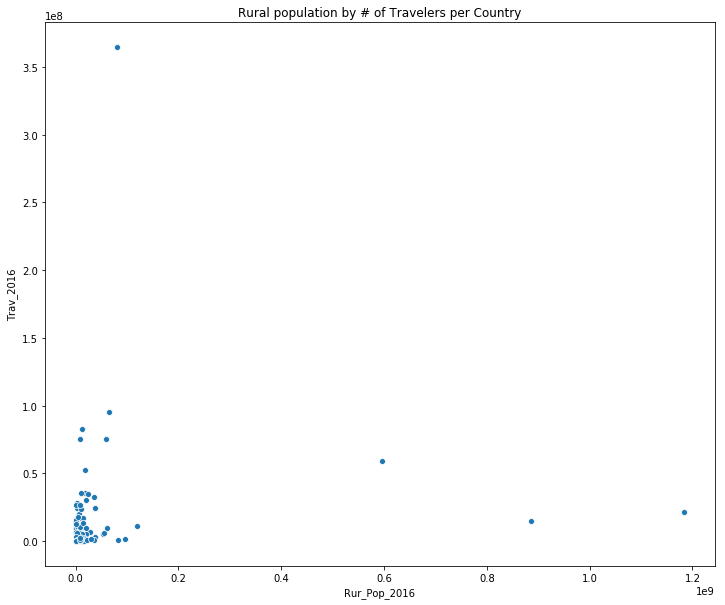

In [14]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='Rur_Pop_2016', y='Trav_2016', data=tot)
plt.title('Rural population by # of Travelers per Country')
plt.show()

### Heatmap

Finally, make a heat map with the top 10 countries (found above in the bar chart) on the y-axis and the years 2000-2016 on the x-axis.

In [15]:
# Subsetting the travelers df to just the columns we want (dropping the others)
trav_sub = trav.drop(['Code', 'Indicator_Name', 'Ind_Code', '1995', '1996', '1997', '1998', '1999',], axis=1)

# dropping NAs as well as the groups (that aren't countries)
trav_sub.dropna()
trav_sub.drop([58,140], inplace=True)

# Sorting by the top 10 countries
trav10 = trav_sub.sort_values(['2016'], ascending = False).head(10)

In [16]:
# Making the index the country name to be used as the y-axis

trav10.set_index('Country_Name', inplace=True)

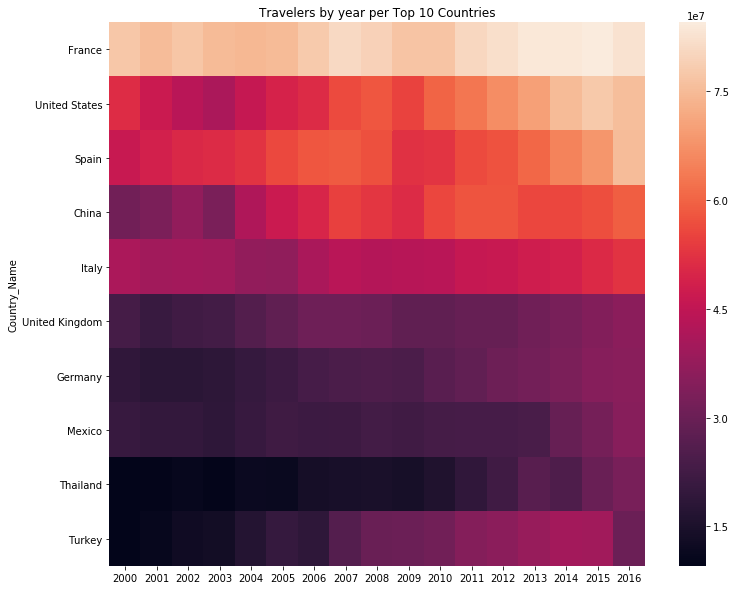

In [17]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(trav10)
plt.title('Travelers by year per Top 10 Countries')
plt.show()